# CS210 - Homework #1: Spotify Playlist Analysis


Exploratory Data Analysis is a fundamental process in the field of data science that helps us gain insights into a dataset by summarizing its main characteristics and identifying patterns and relationships within the data. In this assignment, we will be applying exploratory data analysis techniques to a Spotify playlist to better understand the characteristics of the songs in the playlist. Through this exercise, we will learn scraping, visualize distributions, and uncover insights that can help us make informed decisions about the playlist's content and structure. Whether you are a music lover, aspiring data scientist, or simply interested in exploring the power of data, this assignment will provide you with a hands-on experience in exploratory data analysis that you can apply to any dataset. **You have unlimited freedom to use ChatGPT for this assignment, and we recommend it. Please do not forget to save your ChatGPT chats. Do not use different chats, and do not delete your chat history after you complete the assignment. Besides your notebook, you must also submit for your ChatGPT chat links.**


**In this homework, we offer you 2 ways to get data.**

1 - In this assignment, you will analyze a playlist, and this playlist is available as a table on a website. You can scrape the table from this website, we provide HTML content for this. There is a possibility to retrieve the data using BeautifulSoup. You can also get the table directly from the URL using Selenium, and this way will probably be easier. The homework will start with this part and if you successfully capture the data and use it in the homework, you will start with 25 points.

2 - If you do not want to deal with scraping, we will also provide you with the CSV version of the dataset, and you can use it directly. In this case, naturally you will not have completed the scraping part, but you will still be able to complete the remaining parts of the assignment, and you will not receive any points for the scraping part.




Below, you can find all the set of features, provided in the dataset:

1. **Song:** The name of the track.
2. **Artist:** The name of the artist or group that performed the song.
3. **Popularity:** A numerical measure of the song's popularity.
4. **BPM (Beats Per Minute):** The tempo or speed of the song in beats per minute.
5. **Genres:** The musical genres associated with the song.
6. **Parent Genres:** The broader or parent musical genres of the song.
7. **Album:** The name of the album containing the song.
8. **Album Date:** The release date of the album.
9. **Time:** The duration of the song in minutes and seconds.
10. **Dance:** A numerical value indicating danceability.
11. **Energy:** A numerical value representing the energy level of the song.
12. **Acoustic:** A numerical value indicating the acousticness of the song.
13. **Instrumental:** A numerical value indicating the instrumentalness of the song.
14. **Happy:** A numerical value representing the mood or happiness of the song.
15. **Speech:** A numerical value indicating the presence of speech or lyrics in the song.
16. **Live:** Indicates if the song is a live recording (1 for live, 0 for studio).
17. **Loud:** A numerical value indicating the loudness of the song.
18. **Key:** The musical key in which the song is composed.
19. **Time Signature:** The time signature of the song.
20. **Added At:** The date or timestamp when the song was added to the dataset.
21. **Spotify Track Id:** Unique identifiers assigned to each track by Spotify.
22. **Album Label:** The name of the record label associated with the album.
23. **Camelot:** Information about the musical key or tonal center of the song.
24. **Spotify Track Img:** URLs or references to images associated with the Spotify tracks.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Q1: Scraping  (25 points)

If you want to scrape the playlist, you can retrieve the data using [this playlist analyzer website](https://www.chosic.com/spotify-playlist-analyzer/?plid=4wyQnWDDys6T8A2ni96VfG). Here, you should take the Playlist Table, which contains the songs' information, and convert it to DataFrame. As we mentioned at the beginning of the assignment, using Selenium may be a more logical solution since the content of the site is dynamic. But you are also free to use BeautifulSoup, or read the file directly and start data analysis. If you want to use BeautifulSoup, we provided the static version of the webpage. 

In [2]:
#SCRAPING WAY - 25 POINTS
import bs4 as bs
html_file_name = "CS210 - Homework 1 - for BeautifulSoup.html"

source_file = open(html_file_name, "r", encoding="utf-8")
soup = bs.BeautifulSoup(source_file, "html.parser")
source_file.close()

playlist_table = soup.find(id="tracks-table")
table_head = playlist_table.find("thead").find('tr')
table_body = playlist_table.find("tbody")

columns = []
for feature in table_head:
    columns.append(feature.get_text())

df = pd.DataFrame(columns=columns)

for song in table_body:
    new_entry = dict()
    features = song.contents
    for i in range(len(features)):
        feature = features[i].get_text().strip()
        if "db" in feature:
            feature = feature.replace("db", "").strip()
        try:
            feature = int(feature)
        except ValueError:
            pass
        
        new_entry[columns[i]] = feature

    df.loc[len(df)] = new_entry

Spotify Track Img, Song Preview columns may not be in the data we got from scraping, but we will not use these columns. So you can ignore this columns.

## Q2: Exploring the Dataset (35 points)

Since we complete the scraping, we can finally start deep-diving into the dataset. Now, follow the instructions.

In [3]:
#2pts - show the first 3 rows
df.head(3)

,#,Song,Artist,Popularity,BPM,Genres,Parent Genres,Album,Album Date,Time,...,Happy,Speech,Live,Loud,Key,Time Signature,Added at,Spotify Track Id,Album Label,Camelot
0,1,Crying Lightning,Arctic Monkeys,75,107,"garage rock, modern rock, permanent wave, rock...",Rock,Humbug,2009-08-20,03:44,...,67,0,20,-4,E Minor,4,2023-10-11,6wVWJl64yoTzU27EI8ep20,Domino Recording Co,9A
1,2,Buzzcut Season,Lorde,73,111,"art pop, metropopolis, nz pop, pop","Pop, Electronic",Pure Heroine,2013-09-27,04:06,...,25,0,10,-11,C♯/D♭ Major,4,2023-10-11,51QEyJI5M7uyd8DOh9tqQY,Universal Music New Zealand Limited,3B
2,3,Ode To The Mets,The Strokes,69,92,"alternative rock, garage rock, modern rock, pe...",Rock,The New Abnormal,2020-04-10,05:51,...,20,0,10,-5,C♯/D♭ Minor,4,2023-10-11,1BLOVHYYlH4JUHQGcpt75R,Cult Records/RCA Records,12A


In [4]:
#1pts - show the info of dataframe
df.info()
# print("Data Types\n", df.dtypes)
# print("Columns: ", df.columns)

<class 'pandas.core.frame.DataFrame'>
Index: 326 entries, 0 to 325
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   #                 326 non-null    int64 
 1   Song              326 non-null    object
 2   Artist            326 non-null    object
 3   Popularity        326 non-null    int64 
 4   BPM               326 non-null    int64 
 5   Genres            326 non-null    object
 6   Parent Genres     326 non-null    object
 7   Album             326 non-null    object
 8   Album Date        326 non-null    object
 9   Time              326 non-null    object
 10  Dance             326 non-null    int64 
 11  Energy            326 non-null    int64 
 12  Acoustic          326 non-null    int64 
 13  Instrumental      326 non-null    int64 
 14  Happy             326 non-null    int64 
 15  Speech            326 non-null    int64 
 16  Live              326 non-null    int64 
 17  Loud              326

In [5]:
#2pts - give the statistical summary of numerical columns
df.describe()

,#,Popularity,BPM,Dance,Energy,Acoustic,Instrumental,Happy,Speech,Live,Loud,Time Signature
count,326.000000,326.00000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000
mean,163.500000,50.41411,122.990798,54.895706,60.478528,28.245399,13.380368,43.625767,0.858896,12.055215,-8.128834,3.929448
std,94.252321,23.10292,25.101822,14.852345,20.385164,29.670725,24.219816,22.836027,3.906409,12.615376,3.079755,0.320467
min,1.000000,0.00000,66.000000,11.000000,10.000000,0.000000,0.000000,4.000000,0.000000,0.000000,-20.000000,1.000000
25%,82.250000,40.00000,106.000000,45.000000,45.000000,2.000000,0.000000,26.000000,0.000000,0.000000,-10.000000,4.000000
50%,163.500000,55.00000,122.500000,55.000000,61.000000,17.000000,0.000000,41.000000,0.000000,10.000000,-8.000000,4.000000
75%,244.750000,66.00000,138.000000,66.000000,77.000000,51.750000,13.750000,60.000000,0.000000,17.500000,-6.000000,4.000000
max,326.000000,93.00000,200.000000,89.000000,98.000000,96.000000,95.000000,98.000000,40.000000,80.000000,-2.000000,4.000000


Let's learn more about our dataset. There are various genres in playlists but some of them are more frequent than others. Your task is to determine the top 10 most frequent genres present in the data. Please consider that some songs have multiple genres. And at the end print top 10 genres with their counts.

In [6]:
#5pts
genre_series = df["Genres"]  # The column that contains genres in order
genre_freq = dict()  # How mony times each genre appear

for song_g in genre_series:
    genres = [genre.strip().lower() for genre in song_g.split(",")]  # Multiple genres are seperated by a comma
    for genre in genres:
        # Increase the counter for that genre
        if genre in genre_freq:
            genre_freq[genre] += 1
        else:
            genre_freq[genre] = 1

genre_freq = dict(sorted(genre_freq.items(), key=lambda x: x[1], reverse=True))  # Sort the dictionry of genre frequency by their values

# Print the top 10
for genre in list(genre_freq.keys())[:10]:
    print(f"'{genre}' appears {genre_freq[genre]} times")

'indie rock' appears 113 times
'modern rock' appears 104 times
'art pop' appears 80 times
'rock' appears 74 times
'indie pop' appears 64 times
'chamber pop' appears 58 times
'permanent wave' appears 48 times
'pov: indie' appears 41 times
'indietronica' appears 38 times
'garage rock' appears 37 times


Let's make the analysis a little more detailed. Specifically, you are required to find and display the top 5 most popular music genres based on their average popularity score, but please only consider genres that appear more than 10 times in the dataset. And at the end print top_genres with their popularity score.

In [7]:
#6pts
popularity_series = df["Popularity"]
total_pop_score_by_genre = dict()  # Keep the popularity score of each genre from every song with that genre

for song_g, song_p in zip(genre_series, popularity_series):
    genres = [genre.strip().lower() for genre in song_g.split(",")]  # Multiple genres are seperated by a comma
    for genre in genres:
        if genre_freq[genre] > 10:  # If that genre appears more than 10 times        
            # To work with avarage score,
            # divide the score from the current song with the total number of songs with that genre (genre_freq from the prev. cell)
            if genre in total_pop_score_by_genre:
                total_pop_score_by_genre[genre] += song_p / genre_freq[genre]  
            else:
                total_pop_score_by_genre[genre] = song_p / genre_freq[genre]

total_pop_score_by_genre = dict(sorted(total_pop_score_by_genre.items(), key=lambda x: x[1], reverse=True))  # Sort the genres based on score
# Print the top 5
for genre in list(total_pop_score_by_genre.keys())[:5]:
    print(f"'{genre}' has an avarage popularity score of {total_pop_score_by_genre[genre]:.2f}")

'permanent wave' has an avarage popularity score of 67.92
'pop' has an avarage popularity score of 65.82
'sheffield indie' has an avarage popularity score of 65.65
'garage rock' has an avarage popularity score of 65.03
'la indie' has an avarage popularity score of 62.08


Our dataset contains lots of technical information about the music. Still, we can create different columns for better information source. In this question, we will apply a pretty basic feature engineering approach. Here you need to categorize the music according to popularity and BPM.There will be two new columns named "Popularity_Category" and "BPM_Category". Let it be "High" if its popularity is above the 75th percentile, "Medium" if it falls between 25 and 75 (inclusive), and "Low" for all the others. For BPM, if it is below 100, call it "Slow", if it is between 100 and 130 (inclusive), call it "Medium", and if it is greater than 130, let it be "Fast". Once the categorization is complete, print the value counts for both 'Popularity_Category' and 'BPM_Category'.

In [8]:
#5pts
bpm_series = df["BPM"]

"""
Some of the songs have a popularity score of 0.
Since the popularity scores have roughly a symmetric normal distribution,
I will fill those values with the mean.
"""
# Convert zeros to NaN
filled_popularity_series = popularity_series.replace(0, np.nan)
# Calculate the mean
popularity_mean_filled = filled_popularity_series.mean()
# Fill missing values with the mean
filled_popularity_series = filled_popularity_series.fillna(popularity_mean_filled)

# Replace the popularity scores coulmn in the DataFrame with the filled version
df["Popularity"] = filled_popularity_series

# Get the 75th and 25th percentile values
pop_75 = np.percentile(filled_popularity_series, 75)
pop_25 = np.percentile(filled_popularity_series, 25)

popularity_category = list() # An ordered list to keep the new series' values
bpm_category = list()        # An ordered list to keep the new series' values
for song_idx in range(df.shape[0]):
    if filled_popularity_series[song_idx] > pop_75:
        popularity_category.append("High")
    elif filled_popularity_series[song_idx] > pop_25:
        popularity_category.append("Medium")        
    else:
        popularity_category.append("Low")

    if bpm_series[song_idx] > 130:
        bpm_category.append("Fast")
    elif bpm_series[song_idx] > 100:
        bpm_category.append("Medium")        
    else:
        bpm_category.append("Slow")

# Add the new series to the DataFrame
df["Popularity_Category"] = popularity_category
df["BPM_Category"] = bpm_category

# Get and print the counts
popularity_category_counts = df.value_counts(subset="Popularity_Category")
bpm_category_counts = df.value_counts(subset="BPM_Category")
print(popularity_category_counts, bpm_category_counts, sep="\n\n")

Popularity_Category
Medium    165
Low        82
High       79
Name: count, dtype: int64

BPM_Category
Medium    151
Fast      107
Slow       68
Name: count, dtype: int64


Let's test our filtering skills. Filtering is a significant skill in data science because in many cases you will only need some part of the dataset. In this question, we will filter a song called Crying Lightning by Arctic Monkeys. It's not a song that is arbitrarily chosen by the assistant, you can also take it as a recommendation. :)

In [9]:
#3pts
filtered_song = df[df["Song"] == "Crying Lightning"].loc[0]  # Save the filtered song
df = df[df["Song"] != "Crying Lightning"]
df.head(5)
# print(filtered_song)

,#,Song,Artist,Popularity,BPM,Genres,Parent Genres,Album,Album Date,Time,...,Live,Loud,Key,Time Signature,Added at,Spotify Track Id,Album Label,Camelot,Popularity_Category,BPM_Category
1,2,Buzzcut Season,Lorde,73.000000,111,"art pop, metropopolis, nz pop, pop","Pop, Electronic",Pure Heroine,2013-09-27,04:06,...,10,-11,C♯/D♭ Major,4,2023-10-11,51QEyJI5M7uyd8DOh9tqQY,Universal Music New Zealand Limited,3B,High,Medium
2,3,Ode To The Mets,The Strokes,69.000000,92,"alternative rock, garage rock, modern rock, pe...",Rock,The New Abnormal,2020-04-10,05:51,...,10,-5,C♯/D♭ Minor,4,2023-10-11,1BLOVHYYlH4JUHQGcpt75R,Cult Records/RCA Records,12A,High,Slow
3,4,Instant Crush (feat. Julian Casablancas),"Daft Punk,Julian Casablancas",78.000000,110,"electro, filter house, rock, indie rock","Hip Hop, Electronic, Rock",Random Access Memories,2013-05-20,05:37,...,0,-10,A#/B♭ Minor,4,2023-10-11,2cGxRwrMyEAp8dEbuZaVv6,Columbia,3A,High,Medium
4,5,I Know The End,Phoebe Bridgers,55.151007,111,"indie pop, la indie, pov: indie",Pop,Punisher,2020-06-18,05:44,...,20,-10,C♯/D♭ Major,4,2023-10-11,3cr3oAP4bQFNjZBV7ElKaB,Dead Oceans,3B,Medium,Medium
5,6,Taro,alt-J,55.151007,172,"indie rock, indietronica, modern alternative r...","Rock, Pop",An Awesome Wave,2012-05-28,05:14,...,0,-11,F Major,4,2023-10-11,36ylLzMtvJ2CItc7bN4TcF,Infectious,7B,Medium,Fast


Let's do a more advanced filtering operation. Display the name of the most common album among the tracks that have a "High" popularity, a "Fast" BPM, and are also above the 75th percentile in loudness.



In [10]:
#6pts
loud_series = df["Loud"]
loud_75_perc = np.percentile(loud_series, 75)  # 75th percentile for loudness

# Get the songs that fits the criterias
feasible_songs = df[
    (df["Popularity_Category"] == "High") &
    (df["BPM_Category"] == "Fast") &
    (df["Loud"] > loud_75_perc)
]

# Count the albums from feasible songs and print the one that appears most
feasible_songs.value_counts(subset="Album").idxmax()

'Favourite Worst Nightmare'

Now, display the Camelot code that is most common among the tracks that belong to the top 10% in terms of popularity.



In [11]:
#5pts
pop_90 = np.percentile(popularity_series, 90)  # Get the 90th percentile to filter top 10%

# Filter the top 10%
top_10 = df[df["Popularity"] > 90]

# Print the name of the song and Camelot code
print(top_10[["Song", "Camelot"]])

                Song Camelot
252         cardigan      5A
293  bad idea right?     11B
316           august      7B


## Q3: Visualization and Analysis (40 points)

We learned many things about our dataset. Now let's create some visualizations using tools like Matplotlib, Seaborn etc. To warm up let's start with some univariate analysis. 

For the first question:

- Create a subplot matrix.
- Create a histogram for the 'Popularity_Category' variable with a bin size of 30, the color should be red.
- Set the title of the first subplot as 'Popularities.'
- Set the label for the y-axis as 'Frequencies.'
- Set the label for the x-axis as 'Popularity Category.'
- Set the boundaries for the y-axis as 0 to 200.
- Repeat the above steps for the 'BPM_Category' variable, creating a histogram with a bin size of 30 in the second subplot, the color should be blue.
- Set the title of the second subplot as 'BPM Categories.'
- Set the label for the y-axis as 'Frequencies.'
- Set the label for the x-axis as 'BPM Category.'
- Set the boundaries for the y-axis as 0 to 200.

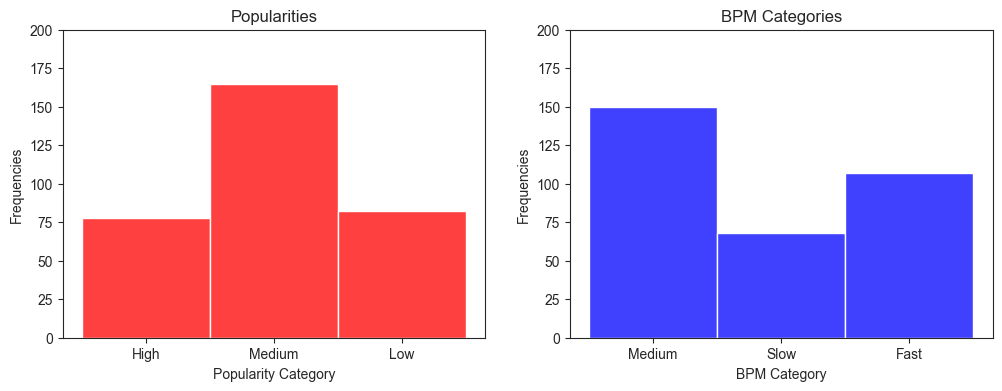

In [12]:
#2pts
with sns.axes_style("ticks"):
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    sns.histplot(data=df, x="Popularity_Category", binwidth=30, color="red", ax=axs[0])
    sns.histplot(data=df, x="BPM_Category", binwidth=30, color="blue", ax=axs[1])
    
    axs[0].set(title="Popularities", xlabel='Popularity Category', ylabel='Frequencies', ylim=(0, 200))
    axs[1].set(title="BPM Categories", xlabel='BPM Category', ylabel='Frequencies', ylim=(0, 200))
    plt.show()

Now let's do some bi-variate analysis. If we want to plot the relationship between Energy and Loudness, think that which plot would be the appropriate choice.

Visualize the relationship between the two according to the plot you choose. Loudness bounds must be -2-20 and energy limits must be 0-100. 

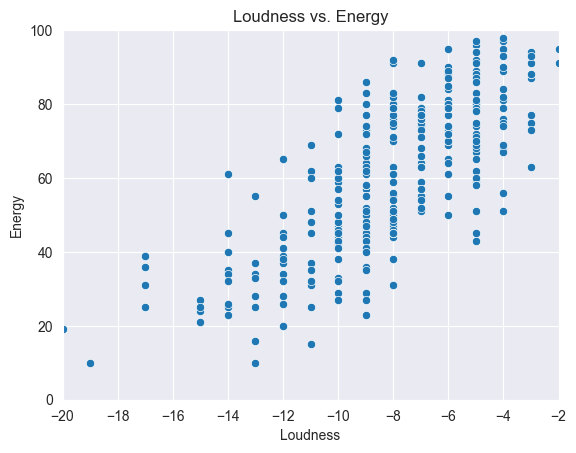

In [13]:
#3pts
energy_series = df["Energy"]

with sns.axes_style("darkgrid"):
    fig, ax = plt.subplots()
    
    sns.scatterplot(data=df, x="Loud", y="Energy", ax=ax)
    ax.set(title="Loudness vs. Energy", xlim=(-20, -2), ylim=(0, 100), xlabel="Loudness", ylabel="Energy")
    plt.show()

Now, create the plot which displays the average popularity of music albums over the years, with each data point representing a year, you can use a line graph with markers, and includes labels and appropriate y-limits ( It must be 5 units below the minimum popularity and 5 units above the maximum popularity.)  You can also rotate the x tick values ​​by 45 degrees. 


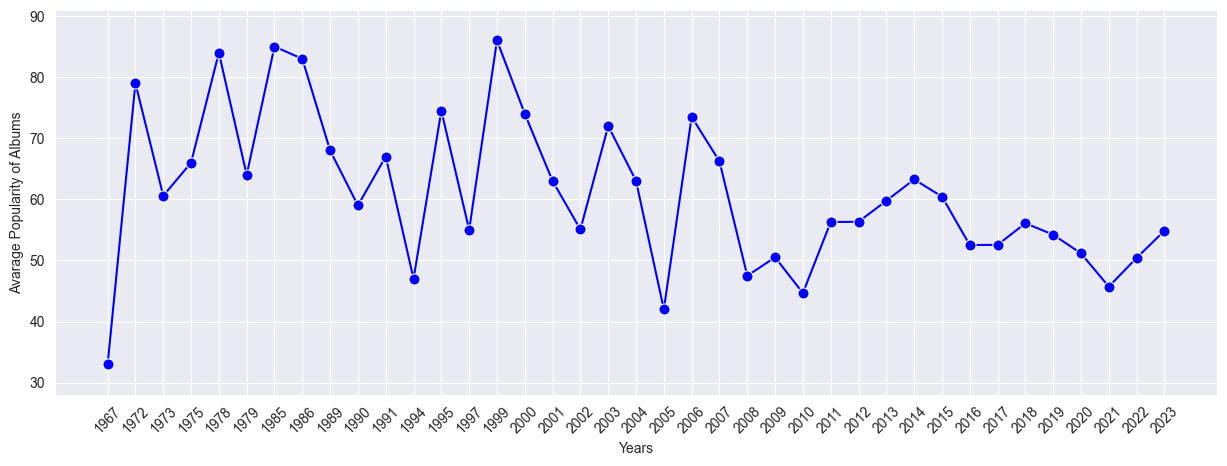

In [14]:
#6pts
df["Album Year"] = [df["Album Date"][i].split("-")[0] for i in range(1, df.shape[0] + 1)]
album_popularities = df.groupby(['Album', 'Album Year'])['Popularity'].mean().reset_index()
year_popularities = album_popularities.groupby('Album Year')['Popularity'].mean().reset_index()


with sns.axes_style("darkgrid"):
    fig, ax = plt.subplots(figsize=(15, 5))
    sns.lineplot(data=year_popularities, x='Album Year', y='Popularity', marker='o', linestyle='-', markersize=8, color="blue", ax=ax)

    ax.set(xlabel="Years", ylabel="Avarage Popularity of Albums", ylim=(min(year_popularities['Popularity']) - 5, max(year_popularities['Popularity']) + 5))
    ax.tick_params(axis='x', labelrotation=45)
    plt.show()

Now, let's create a plot that illustrates the average popularity of music albums across the months of the year. The plot should be in the form of a line graph with markers, with the x-axis representing the months (in a custom order from January to December) and the y-axis representing the average popularity. Make sure to include appropriate labels and set the y-axis limits to be 5 units below the minimum popularity and 5 units above the maximum popularity. Additionally, rotate the x-axis tick values by 45 degrees for better readability. 

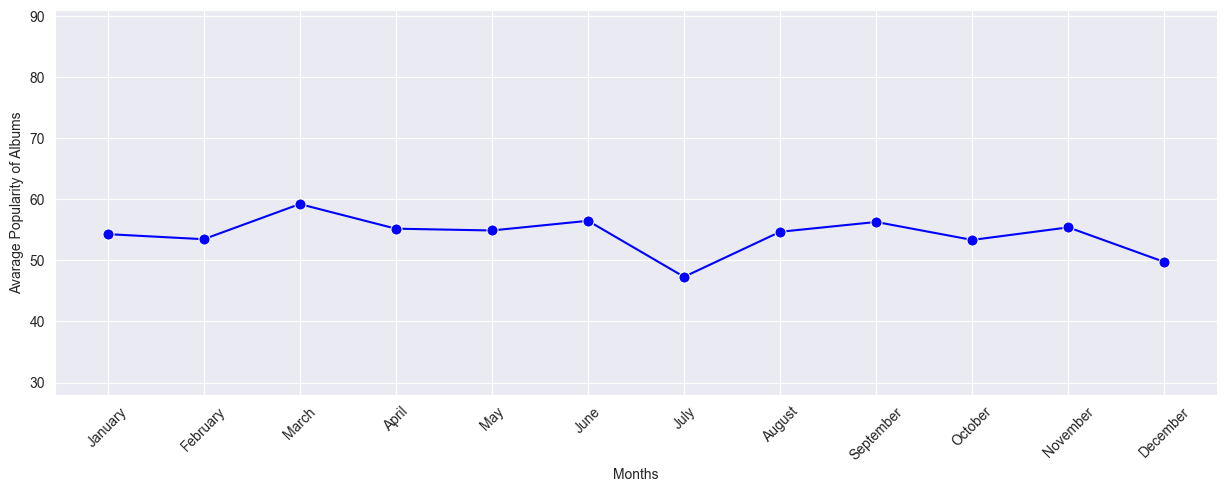

In [150]:
#7pts
month_names = {'00': np.nan, '01': "January", '02': "February", '03': "March", '04': "April", '05': "May", '06': "June", '07': "July",'08': "August", '09': "September", '10': "October", '11': "November", '12': "December"}
df[["Album Month", "Album Month Numeric"]] = [[month_names[df["Album Date"][i].split("-")[1]], df["Album Date"][i].split("-")[1]] for i in range(1, df.shape[0] + 1)]
album_popularities_month = df.groupby(['Album', 'Album Month', 'Album Month Numeric'])['Popularity'].mean().reset_index()
month_popularities = album_popularities_month.groupby(['Album Month', 'Album Month Numeric'])['Popularity'].mean().reset_index()
month_popularities = month_popularities.sort_values(by='Album Month Numeric').reset_index()[["Album Month", "Popularity"]]

with sns.axes_style("darkgrid"):
    fig, ax = plt.subplots(figsize=(15, 5))
    sns.lineplot(data=month_popularities, x='Album Month', y='Popularity', marker='o', linestyle='-', markersize=8, color="blue", ax=ax)

    ax.set(xlabel="Months", ylabel="Avarage Popularity of Albums", ylim=(min(year_popularities['Popularity']) - 5, max(year_popularities['Popularity']) + 5))
    ax.tick_params(axis='x', labelrotation=45)
    plt.show()

Let's create more sophisticated plot. In this question you will also make some operations on the dataset again.

Visualize and compare the BPM (Beats Per Minute) levels in the music of four different artists: Lorde, Big Thief, Wolf Alice and Phoebe Bridgers. The data is presented in a countplot with three categories for BPM levels: Slow, Medium, and Fast. Each artist's contribution to each BPM category is shown using a different color. The y-axis represents the frequency of songs falling into each BPM category. Set the y-axis limits to a range of 0 to 10 for better clarity.

You already see the answer below as an example, you can use inferno as the color code. There may be slight differences in styling, but we expect a very similar answer. Please be careful with the order of x-axis.


<img src="https://i.imgur.com/EAk2mcB.png" alt="barplot-210" border="0" width="500">


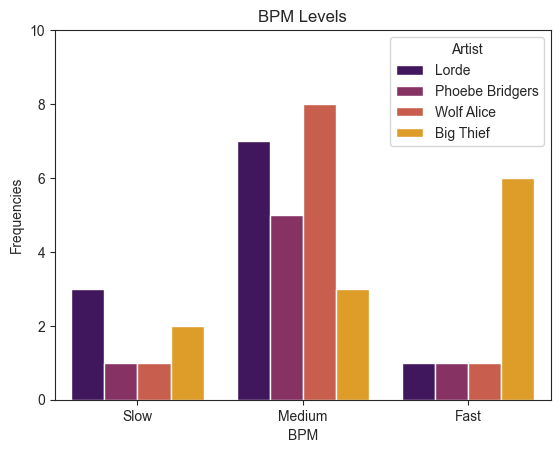

In [16]:
#7pts
filtered_songs = df[
                    (df["Artist"] == "Big Thief") |
                    (df["Artist"] == "Lorde") |
                    (df["Artist"] == "Phoebe Bridgers") |
                    (df["Artist"] == "Wolf Alice")
                ]

with sns.axes_style("ticks"):
    fig, ax = plt.subplots()
    
    sns.countplot(data=filtered_songs, x="BPM_Category", order=["Slow", "Medium", "Fast"], palette="inferno", hue="Artist", legend=True)
    ax.set(title="BPM Levels", xlabel="BPM", ylabel="Frequencies", ylim=(0, 10))
    plt.show()

We are approaching the end. Visualize the aggregated Energy and Acoustic values of songs categorized by the top 10 most common genres in the dataset.

The final visualization should be a stacked bar chart where each bar represents one of the top 10 genres, and the height of the colored segments within each bar denotes the sum of Energy and Acoustic values for songs in that genre. This allows for a quick comparative view of how energetic or acoustic songs from each of the top genres tend to be.

You already see the answer below as an example, you can use ['#669bbc', '#003049'] colors. There may be slight differences in styling, but we expect a very similar answer.


<img src="https://i.imgur.com/eM0q688.png" alt="barplot-210" border="0" width="500">


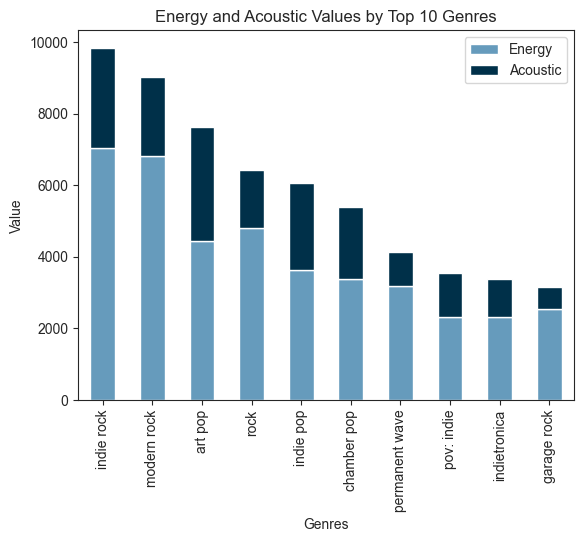

In [52]:
#7pts
genre_dict = dict()

for idx, entry in df[["Genres", "Energy", "Acoustic"]].iterrows():
    genres = [genre.strip().lower() for genre in entry["Genres"].split(",")]  # Multiple genres are seperated by a comma
    energy_score = entry["Energy"]
    acoustic_score = entry["Acoustic"]
    for genre in genres:
        if genre in genre_dict:
            genre_dict[genre]["Energy"] += energy_score
            genre_dict[genre]["Acoustic"] += acoustic_score
            genre_dict[genre]["Frequency"] += 1
        else:
            genre_dict[genre] = dict.fromkeys(("Energy", "Acoustic", "Frequency"), None)
            genre_dict[genre]["Energy"] = energy_score
            genre_dict[genre]["Acoustic"] = acoustic_score
            genre_dict[genre]["Frequency"] = 1

# Create an empty DataFrame to hold the energy and acoustic values by genres
energy_acoustic = pd.DataFrame(columns=["Genre", "Energy", "Acoustic", "Frequency"])

for genre in genre_dict:
    new_entry = {"Genre": genre} | genre_dict[genre]
    energy_acoustic.loc[len(energy_acoustic)] = new_entry

energy_acoustic_top_10 = energy_acoustic.sort_values(by='Frequency', ascending=False).reset_index()[:10][["Genre", "Energy", "Acoustic"]]

with sns.axes_style("ticks"):
    fig, ax = plt.subplots()
    energy_acoustic_top_10.plot(kind="bar", stacked=True, color=['#669bbc', '#003049'], x="Genre", ax=ax)
    ax.set(title="Energy and Acoustic Values by Top 10 Genres", xlabel="Genres", ylabel="Value")
    plt.show()

Now, show the correlations of numerical columns in a heatmap, don't forget that you must only use numerical columns. You can use inferno as a color map.

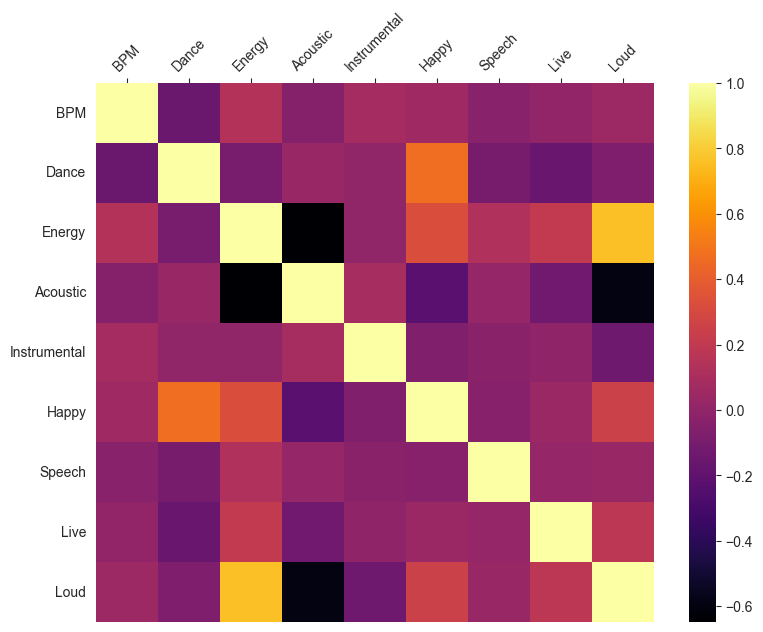

In [104]:
#4pts
numeric_columns = df.select_dtypes('int64').drop(columns=["#", "Time Signature"])
# print(numeric_columns.info())
with sns.axes_style("darkgrid"):
    fig, ax = plt.subplots(figsize=(9, 7))
    sns.heatmap(data=numeric_columns.corr(), cmap="inferno")
    ax.xaxis.tick_top()
    ax.tick_params(axis='x', labelrotation=45)
    plt.show()

And we will conclude the assignment with a simple question. Though this question isn't directly related to visualization, you must retrieve and print the HTML content of the chat URL you used in ChatGPT using BeautifulSoup. 

In [109]:
#4pts
chat_url = "https://chat.openai.com/share/ea095724-4bdf-43ac-9ad0-b111da805f0d"
print("HTML content: ")

<Response [403]>
HTML content:
<html>
<head>
<style global="">body{font-family:Arial,Helvetica,sans-serif}.container{align-items:center;display:flex;flex-direction:column;gap:2rem;height:100%;justify-content:center;width:100%}@keyframes enlarge-appear{0%{opacity:0;transform:scale(75%) rotate(-90deg)}to{opacity:1;transform:scale(100%) rotate(0deg)}}.logo{color:#8e8ea0}.scale-appear{animation:enlarge-appear .4s ease-out}@media (min-width:768px){.scale-appear{height:48px;width:48px}}.data:empty{display:none}.data{border-radius:5px;color:#8e8ea0;text-align:center}@media (prefers-color-scheme:dark){body{background-color:#343541}.logo{color:#acacbe}}</style>
<meta content="375" http-equiv="refresh"/>
</head>
<body>
<div class="container">
<div class="logo">
<svg class="scale-appear" fill="none" height="41" strokewidth="2" viewbox="0 0 41 41" width="41" xmlns="http://www.w3.org/2000/svg">
<path d="M37.5324 16.8707C37.9808 15.5241 38.1363 14.0974 37.9886 12.6859C37.8409 11.2744 37.3934 9.91076

Congratulations! You've reached the end of your assignment. In this assignment, we dealt with data questions about albums, artists, and many music related data over Spotify data. I hope it has been a fun process.

**If you want to listen to the playlist we analyzed:**
https://open.spotify.com/playlist/4wyQnWDDys6T8A2ni96VfG?si=1c69c078d81f47f5

See you later!
    
<img src="https://i.imgur.com/KSbQFe7.png" alt="barplot-210" border="0" width="300">

***dall-e prompt***: an oil painting of data science student does homework in pain

